<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/123_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 123: kNN Regression I

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous class, we implemented kNN classifier using `sklearn` module of Python. We also learned how to decide the number of neighbours ($k$) for kNN classifier.

In today's class, we will implement three more classification algorithms for water quality prediction dataset and compare the performance of these algorithms with kNN classifier.

We will also understand the core idea behind kNN regressor and how to use it to solve regression problems in machine learning.


Before that, let us revisit the problem statement and recall the concepts learned in the previous class and start this class from **Activity 1: Building Decision Tree Classifier Model**.





---

#### Problem Statement

Safe drinking water is essential for every form of life on earth. for public health. The United Nations (UN) and other countries declared access to safe drinking water as a fundamental human right. This is important as a health and development issue at a national, regional, and local level.

You are provided with a dataset consisting of water quality metrics for 3276 different water bodies. Your job is to  create a model to determine if the sample tested from the water body is fit for human consumption or not.

Following are the attributes of this dataset:


1. `ph`: The pH value indicates the acidic or alkaline condition of water status. The pH of pure water is 7. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.

2. `Hardness`: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.

3. `Solids`: Also known as TDS (total dissolved solids). Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, etc. These minerals produced un-wanted taste and diluted colour in appearance of water.  The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l prescribed for drinking purposes.

4. `Chloramines`: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per litre ($mg/L$ or 4 parts per million (ppm)) are considered safe in drinking water.

5. `Sulfate`: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.  Sulfate concentration in seawater is about 2,700 milligrams per litre ($mg/L$). It ranges from 3 to 30 $mg/L$ in most freshwater supplies.


6. `Conductivity`: Pure water is not a good conductor of electric current rather’s a good insulator.  Electrical conductivity (EC) measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 micro siemens per centimetre ($\mu S/cm$).

7. `Organic_carbon`: Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water.

8. `Trihalomethanes`: Trihalomethanes (THMs) are chemicals which may be found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.

9. `Turbidity`: The turbidity of water depends on the quantity of solid matter present in the suspended state. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. `Potability`: Indicates if water is safe for human consumption where `1` means Potable and `0` means Not potable.


**Dataset Credits:** https://www.kaggle.com/adityakadiwal/water-potability

**Dataset Link:** https://s3-whjr-v2-prod-bucket.whjr.online/69e55114-dbd8-46c8-9c0a-4bdf19008d79.csv




In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

water_df = pd.read_csv("https://s3-whjr-v2-prod-bucket.whjr.online/69e55114-dbd8-46c8-9c0a-4bdf19008d79.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


---

#### Recap

#### Data Preprocessing

Let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the `water_df` DataFrame.



In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Check missing values using the 'isnull().sum()' function.
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
# Handle missing value with median of features
water_df["ph"].fillna(value = water_df["ph"].median(), inplace = True)
water_df["Sulfate"].fillna(value = water_df["Sulfate"].median(), inplace = True)
water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median(), inplace = True)

In [ ]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

---

#### Data Preparation

For our dataset, the column `Potability` is the target variable and other columns except `Potability` are the feature variables.
Let us create a countplot to display the count of  each target class.



In [ ]:
# Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features_df)
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


---

#### Building kNN Classifier Model



In [ ]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)


In [ ]:
# Train kNN classifier model for 'k = 3'
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3.score(X_train, y_train))
print("Test set accuracy:", knn3.score(X_test, y_test))

Train set accuracy: 0.8146532926297427
Test set accuracy: 0.612410986775178


In [ ]:
# Train kNN classifier model for 'k = 7'
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn7.score(X_train, y_train))
print("Test set accuracy:", knn7.score(X_test, y_test))

Train set accuracy: 0.7313563017880506
Test set accuracy: 0.6185147507629705


---

#### Finding an optimal $k$ value

We need to find a value of $k$ which can give a  good train and test set accuracy. For this, we can determine the accuracy scores for neighbours from `1` to `20` and plot these scores




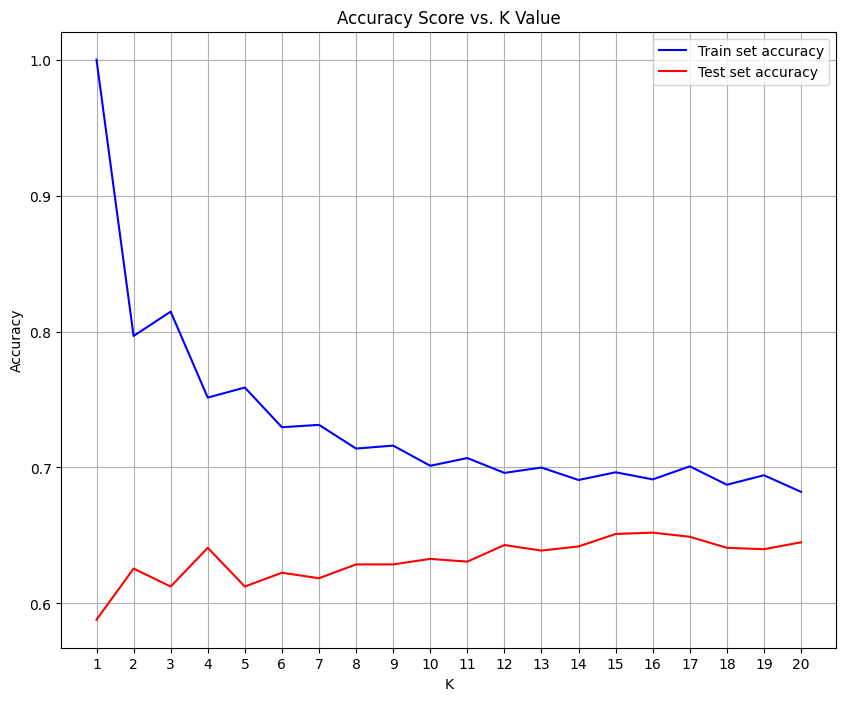

In [ ]:
# Plot accuracy scores of train and test sets for 1 to 20 neighbours.
accuracy_train = []
accuracy_test= []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), accuracy_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), accuracy_test, color= 'red', label = "Test set accuracy")
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Train kNN classifier model for 'k = 15'
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn15.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15.score(X_train, y_train))
print("Test set accuracy:", knn15.score(X_test, y_test))

Train set accuracy: 0.6964675098124727
Test set accuracy: 0.6510681586978637


In [ ]:
# Display the precision, recall and f1-score values.
from sklearn.metrics import classification_report
print(classification_report(y_test, knn15.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       600
           1       0.62      0.28      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.64      0.65      0.61       983



---

#### Resampling



In [ ]:
# Determine the percentage of samples belonging to class '0' and class '1' in 'y_train'.
y_train.value_counts(normalize = True) * 100

0    60.968164
1    39.031836
Name: Potability, dtype: float64


**Resampling** is a common practice to address the imbalanced dataset issue. Although
there are many techniques within resampling, here we’ll be learning the three most
popular techniques:
1. Random Undersampling
2. Random Oversampling
3. Synthetic Minority Oversampling Technique (SMOTE)



---

#### Random Undersampling

Random undersampling randomly selects and removes the samples from the majority class to match minority class count. Here, we will resample the target variable, `Potability`



In [ ]:
# Count the number of class 0 and 1 samples in train set before undersampling.
y_train.value_counts()

0    1398
1     895
Name: Potability, dtype: int64

In [ ]:
# Perform random undersampling on train set
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train) # fit predictor and target variable

In [ ]:
# Check the type and shapes of the 'X_rus_train' and 'y_rus_train' datasets.
print(type(X_rus_train), X_rus_train.shape)
print(type(y_rus_train), y_rus_train.shape)

<class 'pandas.core.frame.DataFrame'> (1790, 9)
<class 'pandas.core.series.Series'> (1790,)


In [ ]:
# Find the number of occurrences of class '0' and class '1' values in the 'y_rus_train' NumPy array.
print("Number of class 0 samples:", sum(y_rus_train == 0))
print("Number of class 1 samples:", sum(y_rus_train == 1))

Number of class 0 samples: 895
Number of class 1 samples: 895


In [ ]:
# Train kNN classifier model again for 'k = 15' with undersampled train set.
from sklearn.neighbors import KNeighborsClassifier
knn_rus= KNeighborsClassifier(n_neighbors = 15)
knn_rus.fit(X_rus_train, y_rus_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_rus.score(X_rus_train, y_rus_train))
print("Test set accuracy:", knn_rus.score(X_test, y_test))

Train set accuracy: 0.6849162011173184
Test set accuracy: 0.624618514750763


In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_rus.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       600
           1       0.52      0.50      0.51       383

    accuracy                           0.62       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.62      0.62       983



---

#### Random Oversampling

Random overrsampling randomly selects and added the samples from the minority class to match majority class count. Here, we will resample the target variable, `Potability`



In [ ]:
# Perform random undersampling on train set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train) # fit predictor and target variable

In [ ]:
# Check the type and shapes of the 'X_ros_train' and 'y_ros_train' datasets.
print(type(X_ros_train), X_ros_train.shape)
print(type(y_ros_train), y_ros_train.shape)

<class 'pandas.core.frame.DataFrame'> (2796, 9)
<class 'pandas.core.series.Series'> (2796,)


In [ ]:
# Find the number of occurrences of class '0' and class '1' values in the 'y_ros_train' NumPy array.
print("Number of class 0 samples:", sum(y_ros_train == 0))
print("Number of class 1 samples:", sum(y_ros_train == 1))

Number of class 0 samples: 1398
Number of class 1 samples: 1398


In [ ]:
# Train kNN classifier model for 'k = 15'
from sklearn.neighbors import KNeighborsClassifier
knn_ros = KNeighborsClassifier(n_neighbors = 15)
knn_ros.fit(X_ros_train, y_ros_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_ros.score(X_ros_train, y_ros_train))
print("Test set accuracy:", knn_ros.score(X_test, y_test))

Train set accuracy: 0.7174535050071531
Test set accuracy: 0.5839267548321465


In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_ros.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       600
           1       0.47      0.47      0.47       383

    accuracy                           0.58       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.58      0.58      0.58       983



---

#### Resampling using SMOTE

SMOTE Resampling synthesizes the artificial data points for the minority class data to balance a highly imbalanced dataset. Here, we will resample the target variable, `Potability`



In [ ]:
# Apply the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' class from the 'imblearn.over_sampling' module.
from imblearn.over_sampling import SMOTE

# Initialise the 'SMOTE()' constructor.
smote = SMOTE(random_state = 42)

# Call the 'fit_sample()' function with 'X_train' and 'y_train' as inputs.
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Find the number of occurrences of class '0' and class '1' values in the 'y_sm_train' NumPy array.
print("Number of class 0 samples:", sum(y_sm_train == 0))
print("Number of class 1 samples:", sum(y_sm_train == 1))

Number of class 0 samples: 1398
Number of class 1 samples: 1398


In [ ]:
# Train kNN classifier model for 'k = 15'
# Build the model.
knn_sm = KNeighborsClassifier(n_neighbors = 15)

# Call the 'fit()' function.
knn_sm.fit(X_sm_train, y_sm_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_sm.score(X_ros_train, y_ros_train))
print("Test set accuracy:", knn_sm.score(X_test, y_test))

Train set accuracy: 0.6938483547925608
Test set accuracy: 0.5859613428280773


In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       600
           1       0.47      0.54      0.50       383

    accuracy                           0.59       983
   macro avg       0.57      0.58      0.57       983
weighted avg       0.60      0.59      0.59       983





**Which resampling technique is the best❓**

There is no one answer to this question! We can build classification models on the resampled datasets and compare the accuracy scores.

By looking at various evaluation metrics obtained for each of the resampled datasets, we can say that **random undersampling** is performing better for both target labels for $k = 15$ nearest neighbour model.

**Note:** You may obtain different accuracy scores for other $k$ values and thus, you can choose a resampling technique which provides the best result.




Let us now deploy Decision Tree classifier model and evaluate whether it can give better accuracy than kNN algorithm.

---

#### Activity 1: Building Decision Tree Classifier Model


Let's proceed with **Decision Tree classifier** for the classifier design. We will  use `GridSearchCV` to obtain the optimal classifier hyperparameters.

To tune the hyperparameters:

1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` module.

2. Define dictionary, say `dtc_params` to select which parameters from `DecisionTreeClassifier` class you want to run the optimisation. Let us set:

  - `criterion`: `['gini','entropy']` (function to measure the quality of a split).
  
  - `max_depth`: `2` to `10` (maximum depth of the tree).

  - `min_samples_split`: `5` to `10` (minimum number of samples required to split an internal node).

  - `min_samples_leaf` : `5` to `10` (minimum samples in leaf node).

  
3. Construct a decision tree grid `dtc_grid` using `GridSearchCV` function with following inputs:

 - `DecisionTreeClassifier (random_state = 42)`: The classifier model we want to deploy.

 - `dtc_params`: The set of parameters for which classifier performance would be evaluated.

 - `scoring`: Use `'accuracy'` as the scoring criteria.

4. Call the `fit()` function on the `dtc_grid` to find the best fit and pass unbalanced train sets `X_train` and `y_train` as inputs.

5. Print the hyperparameters which exhibit highest score using `dtc_grid.best_estimator_`.




In [ ]:
# S1.1: Obtain the optimal Decision Tree classifier hyperparameters using GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for optimisation
dtc_params = {'criterion':['gini','entropy'], 'max_depth': np.arange(2, 11),
              'min_samples_split' : np.arange(5, 11),
              'min_samples_leaf' : np.arange(5, 11),
             }

# Training
dtc_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                        dtc_params, scoring = 'accuracy' , n_jobs = -1)
dtc_grid.fit(X_train, y_train)

# Print the best hyperparameters
print(dtc_grid.best_estimator_)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=5, random_state=42)


Here, we got the hyperparameters that gives the best estimator for Decision Tree Classifier on the training dataset.

Next, let's model the problem using the best hyperparameters obtained from `GridSearchCV`. For this:

 1. Create a `dtc_clf` object of `DecisionTreeClassifier` class and pass the hyperparameters obtained from `GridSearchCV`.

 2. Call the `fit()` function on `dtc_clf` object with `X_train` and `y_train`.

 3. Call the `predict()` function on the `dtc_clf` object with `X_test` as the input parameter.

 4. Print the train and test set accuracy scores using `score()` function.

In [ ]:
# S1.2: Train a Decision tree model using the best hyperparameters.

dtc_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=5, random_state=42)

# Fit the DecisionTreeClassifier model and  perform prediction.
dtc_clf.fit(X_train, y_train)
dtc_y_pred = dtc_clf.predict(X_test)

# Call the 'score()' function to check the accuracy score of the model.
print("Train set accuracy:", dtc_clf.score(X_train, y_train))
print("Test set accuracy:", dtc_clf.score(X_test, y_test))

Train set accuracy: 0.7117313563017881
Test set accuracy: 0.6612410986775178


The train set accuracy is around $72\%$ and test set accuracy is around $66\%$ which is less than that of SVC model. Let's print the classification report to get an in-depth overview of the classifier performance.

In [ ]:
# S1.3: Print the classification report for DecisionTreeClassifier
print(classification_report(y_test,dtc_y_pred))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77       600
           1       0.66      0.26      0.38       383

    accuracy                           0.66       983
   macro avg       0.66      0.59      0.57       983
weighted avg       0.66      0.66      0.62       983



You may observe that the Decision Tree classifier is working well for target label `0`, but not for label `1`.  This may be due to unbalanced train set, hence you can use undersampled or oversampled train set and evaluate model's performance.

Let us check how Random Forest classifier performs for unbalanced train set.

---

#### Activity 2: Building Random Forest Classifier Model

Let us deploy Random Forest classifier model for the current problem statement. We will again use `GridSearchCV` to obtain the optimal classifier hyperparameters.

Follow the steps given below to tune the hyperparameters needed for `RandomForestClassifier()` model:

1. Import `GridSearchCV` class from the `sklearn.model_selection` module. Also, import the `RandomForestClassifier` class from `sklearn.ensemble` module.

2. Define dictionary, say `rfc_params` to select which parameters from `RandomForestClassifier` class you want to run the optimisation. Let us set:

  - `max_depth` (maximum depth of the tree): `[2, 5, 8, 10]`

  - `n_estimators` (number of trees in the forest): `[10, 50, 100]`

  

3. Construct a Random forest grid `rfc_grid` using `GridSearchCV` function with following inputs:

 - `RandomForestClassifier(random_state = 42)`: The classifier model we want to deploy. Pass `random_state = 42` for getting consistent results.

 - `rfc_params`: The set of parameters for which classifier performance would be evaluated.

 - `scoring`: Use `'accuracy'` as the scoring criteria.

4. Call the `fit()` function on the `rfc_grid` to find the best fit. Pass unbalanced train set `X_train` and `y_train` as inputs.

  **Note:** As of now, we are  evaluating model's performance for only unbalanced train set. You can also test undersampled and oversampled train set's performance.

5. Print the hyperparameters which exhibit highest score using `rfc_grid.best_estimator_`.



In [ ]:
# S2.1: Obtain the optimal Random forest classifier hyperparameters using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_params = {"max_depth":[2, 5, 8, 10], "n_estimators":[10, 50, 100] }


# Training.
rfc_grid = GridSearchCV(RandomForestClassifier(random_state = 42), rfc_params,
                        scoring = 'accuracy' , n_jobs = -1)
rfc_grid.fit(X_train, y_train)

# Print the best hyperparameters.
print(rfc_grid.best_estimator_)


RandomForestClassifier(max_depth=10, random_state=42)


Here, we got the hyperparameters that gives the best estimator for Random Forest Classifier on the training dataset.

Next, let's build a Random Forest classifier model using the best hyperparameters obtained from `GridSearchCV`. For this:

 1. Create a `rfc_clf` object of `RandomForestClassifier` class and pass the hyperparameters obtained from `GridSearchCV`.

 2. Call the `fit()` function on `rfc_clf` object and pass unbalanced train set as inputs.

 3. Call the `predict()` function on the `rfc_clf` object with `X_test` as the input parameter.

 4. Print the train and test set accuracy scores using `score()` function.

In [ ]:
# S2.2: Train an RandomForestClassifier model using the best hyperparameters.

rfc_clf= RandomForestClassifier(max_depth=10, random_state=42)

# Fit the model and perform prediction.
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)

# Call the 'score()' function to check the accuracy score of the model.
print("Train set accuracy:", rfc_clf.score(X_train, y_train))
print("Test set accuracy:", rfc_clf.score(X_test, y_test))

Train set accuracy: 0.8477976450065416
Test set accuracy: 0.6602238046795524


The train set accuracy is around $85\%$ and test set accuracy is around $66\%$ which is good accuracy score. However let's print the classification report to get an in-depth overview of the classifier performance.

In [ ]:
# S2.3: Print the classification report for Random forest classifier
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       600
           1       0.70      0.22      0.34       383

    accuracy                           0.66       983
   macro avg       0.68      0.58      0.55       983
weighted avg       0.67      0.66      0.60       983



You may observe that the similar to Decision Tree classifier, the Random Forest classifier is working well for target label `0`, but not for label `1`.  This may be due to unbalanced train set, hence you can use undersampled or oversampled train set and evaluate model's performance.

Let us check how the Support Vector classifier performs for unbalanced train set.

---

#### Activity 3: Building SVC Model

Let's proceed with **Support Vector classifier** for the classifier design. We will again use `GridSearchCV` to obtain the optimal classifier hyperparameters.

Follow the steps given below to tune the hyperparameters needed for `SVC()` model:


1. Import the `SVC` class from the `sklearn.svm` module.


2. Define dictionary, say `svc_params` to select which parameters from `SVC` class you want to run the optimisation. Let us set:

  - `gamma`: `[1, 0.1]`

  - `kernel`: `['rbf', 'linear']`

3. Construct a SVC grid `svc_grid` using `GridSearchCV` function with following inputs:

 - `SVC (random_state = 42)`: The classifier model we want to deploy.

 - `svc_params`: The set of parameters for which classifier performance would be evaluated.

 - `scoring`: Use `'accuracy'` as the scoring criteria.

4. Call the `fit()` function on the `svc_grid` to find the best fit. Pass the unbalanced train sets `X_train` and `y_train` as inputs.

5. Print the hyperparameters which exhibit highest score using `svc_grid.best_params_`.


In [ ]:
# S3.1: Obtain the optimal SVC classifier hyperparameters using GridSearchCV

# Import the required library
from sklearn.svm import SVC

# Define the parameters grid for optimisation
svc_params = {'gamma': [1, 0.1], 'kernel': ['rbf', 'linear']}

# Training
svc_grid = GridSearchCV(SVC(random_state = 42), svc_params, scoring = 'accuracy' , n_jobs = -1)
svc_grid.fit(X_train, y_train)

# Print the best hyperparameters
print(svc_grid.best_params_)

{'gamma': 0.1, 'kernel': 'rbf'}


Here, we got the hyperparameters that gives the best estimator for Support Vector Classifier (SVC) on the training dataset.

Next, let's model the problem using the best hyperparameters obtained from `GridSearchCV`. For this:

 1. Create a `svc_clf` object of `SVC` class and pass the hyperparameters obtained from `GridSearchCV`.

 2. Call the `fit()` function using the `svc_clf` object with `X_train` and `y_train`.

 3. Call the `predict()` function using the `svc_clf` object with `X_test` as the input parameter.

 4. Print the train and test set accuracy scores using `score()` function.

In [ ]:
# S3.2: Train an SVC model using the best hyperparameters.

svc_clf = SVC(gamma = 0.1,  kernel = 'rbf', random_state = 42)


# Fit the SVC model and  perform prediction.
svc_clf.fit(X_train, y_train)
svc_y_pred = svc_clf.predict(X_test)

# Call the 'score()' function to check the accuracy score of the model.
print("Train set accuracy:", svc_clf.score(X_train, y_train))
print("Test set accuracy:", svc_clf.score(X_test, y_test))

Train set accuracy: 0.7287396423898822
Test set accuracy: 0.6826042726347915


The train set accuracy is around $73\%$ and test set accuracy is around $68\%$. Let's print the classification report to get an in-depth overview of the classifier performance.

In [ ]:
# S3.3: Print the classification report for SVC classifier
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       600
           1       0.75      0.28      0.41       383

    accuracy                           0.68       983
   macro avg       0.71      0.61      0.60       983
weighted avg       0.70      0.68      0.64       983



You may observe that the SVC classifier is working well for both the target labels when unbalanced train set is used. However, its overall accuracy is less than Random Forest classifier but more than Decision Tree classifier.





Hence, SVC model performs better than kNN and Random forest models in predicting both the target labels when the train set is unbalanced. So what conclusions can be drawn after evaluating the four classifier models?

**Conclusions:**
1. Try a bunch of algorithms and compare their performances to choose the best one for your specific task.

2. Always start with simpler models like kNN and Logistic Regression. Complex models like Random Forest classifier and SVC involves many hyperparameters. Tuning these hyperparameters to improve accuracy may result in overfitting as the model would try to learn too much from the training data.

  Hence, use these complex models only when the less complex models like  kNN and Logistic Regression which involves less hyperparameters are not giving satisfactory accuracy scores for all the target labels.

3. Perform undersampling and oversampling only when the dataset is highly imbalanced and the f1 scores for all the target labels are not satisfactory.


Congratulations! You have successfully implemented kNN algorithm to solve a classification problem where the algorithm predicts discrete values such as `0` and `1` or `Yes` and `No`. Let us now learn how to use kNN algorithm to predict continuous values such as price, salary, age etc.


---

#### Activity 4: Applying kNN for Regression


Suppose we have age, height, and weight for 10 people and we need to predict the weight of a new person using the age and height information that we have.

The data including age, height, and weight information is shown below:

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/86c216dc-5981-4381-9c59-40c2cd70fa53.PNG"/></center>

Let us create a pandas DataFrame containing the above columns by using the following dictionary:

```python
data_dict = {'ID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
		'age': [45, 32, 26, 23, 28, 30, 34, 19, 36, 40],
		'height':[5, 5.6, 5.11, 5.5, 5.8, 5.6, 5.9, 5.3, 5.8, 4.8],
	  'weight' : [77, 58, 47, 45, 60, 55, 59, 40, 60, 72]}
```

In [ ]:
# S4.1: Create a dataset for age, height and weight of people
data_dict = {'ID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
		'age': [45, 32, 26, 23, 28, 30, 34, 19, 36, 40],
		'height':[5, 5.6, 5.11, 5.5, 5.8, 5.6, 5.9, 5.3, 5.8, 4.8],
	  'weight' : [77, 58, 47, 45, 60, 55, 59, 40, 60, 72]}

# Create a DataFrame from the dictionary
data_df = pd.DataFrame(data_dict)
data_df

,ID,age,height,weight
0,1,45,5.00,77
1,2,32,5.60,58
2,3,26,5.11,47
3,4,23,5.50,45
4,5,28,5.80,60
5,6,30,5.60,55
6,7,34,5.90,59
7,8,19,5.30,40
8,9,36,5.80,60
9,10,40,4.80,72


Let's plot the `age` and `height` of persons on a  scatter plot. Also annotate each data point with their ID number. For example, first data point must be labelled as `1`, second data point must be labelled as `2` and so on. For this purpose, use `annotate()` function of `matplotlib.pyplot` module.

You can use `help()` function to understand the syntax of `annotate()` function in detail.

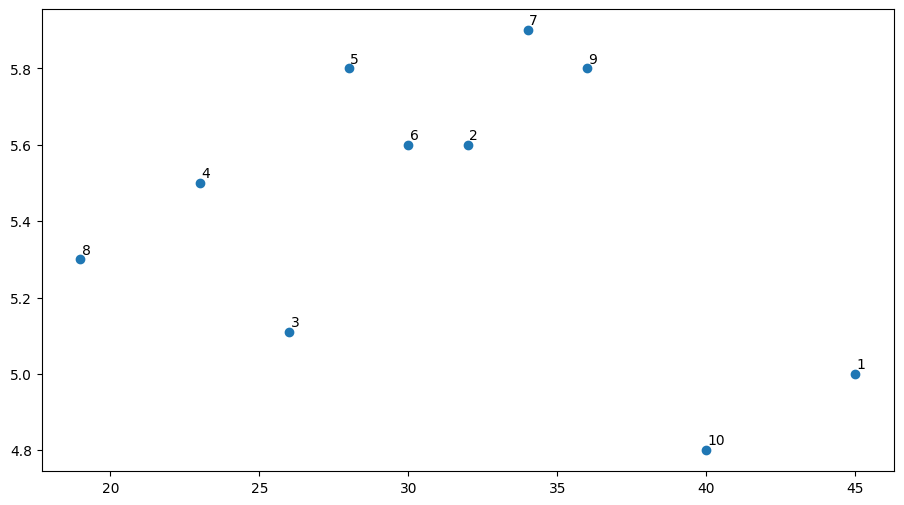

In [ ]:
# S4.2: Create a scatter plot showing person's age and height with each data point numbered using their ID.
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))

# Plot a scatter plot and using a loop annotate the points
plt.scatter(data_df['age'],data_df['height'])
for label, x, y in zip(data_df['ID'],data_df['age'], data_df['height']):
  plt.annotate(label, xy=(x, y), xytext=(1, 4), textcoords='offset points')
plt.show()

In the above graph, the $x$-axis represents the age of a person (in years) and the $y$-axis represents the height (in feet). The points are numbered according to the ID values.

Suppose there is a new person having ID as `11` whose age is `38` and height is `5.5`. We need to predict the weight of this person based on his age and height.


<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/5c2d5530-37a0-4533-9490-d5eebcb141f9.png"/>

In the above graph, the person with ID11 is our test point. If we try to identify the weight of ID11 based on the plot, we would say that since ID11 is closer to points `2` and `9`, so it must have a weight similar to these IDs. Let us find out how kNN algorithm  predicts the weight of ID11.

**How kNN regression work?**

In kNN, a new data point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID11 has height and age similar to ID2 and ID9, so the weight would also approximately be the same.

If we use kNN classifier in this case, it would assign the new data point ID11 to the class to which the majority of its nearest points belong. So the weight of ID11 would be equal to weight of either ID2 or ID9 (if $k = 2$).

However, in kNN regression, the average of the values is taken to be the final prediction. Thus, the weight of ID11 would be the mean of weights of ID2 and ID9 (if $k = 2$) for kNN regression.

Thus, kNN regression has the following basic steps:

<center><img src= "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/11ad6a31-50bd-4ec4-aea0-e947a832e296.png"/></center>

Let us first calculate the distance between the new data point and each training point. The most commonly used distance metric is Euclidean distance.

First, create a separate DataFrame containing only the feature variables i.e. `age` and `height`.



In [ ]:
# S4.3: Create a separate DataFrame containing the feature variables.
feature_df=data_df[['age','height']]
feature_df

,age,height
0,45,5.00
1,32,5.60
2,26,5.11
3,23,5.50
4,28,5.80
5,30,5.60
6,34,5.90
7,19,5.30
8,36,5.80
9,40,4.80


We can calculate the Euclidean distance between each data point of `feature_df` and the new data point ID11(`38`, `5.5`) using `linalg.norm()` function of `numpy` module.

**Syntax of `linalg.norm()` function:** `np.linalg.norm(data_1 - data_2, axis = 1)`

Where,
- `data_1` and `data_2` are the two data points whose euclidean distance is to be calculated.
- `axis = 1` indicates that each row of DataFrame has to be normalised separately.

**Note:** Use `to_numpy()` function to convert each row of DataFrame to a NumPy array.



In [ ]:
# S4.4: Compute Euclidean distance between training data and ID11
id11 = [38, 5.5]
dist_from_id11 = np.linalg.norm(feature_df.to_numpy() - id11, axis = 1)
dist_from_id11

array([ 7.01783442,  6.00083328, 12.00633583, 15.        , 10.00449899,
        8.00062498,  4.01995025, 19.0010526 ,  2.02237484,  2.11896201])

Hence, we have obtained a NumPy array containing the  distances of all the 10 training points from the new data point ID11. Let us add this array as a new column to the original DataFrame `data_df`.

In [ ]:
# S4.5: Add the distance array as a new column to the original dataset.
data_df['Distance from ID11 (38, 5.5)'] = dist_from_id11
data_df

,ID,age,height,weight,"Distance from ID11 (38, 5.5)"
0,1,45,5.00,77,7.017834
1,2,32,5.60,58,6.000833
2,3,26,5.11,47,12.006336
3,4,23,5.50,45,15.000000
4,5,28,5.80,60,10.004499
5,6,30,5.60,55,8.000625
6,7,34,5.90,59,4.019950
7,8,19,5.30,40,19.001053
8,9,36,5.80,60,2.022375
9,10,40,4.80,72,2.118962


Hence, we have obtained the Euclidean distance between each training point and the new data point ID11(age = 38, height = 5.5).

- If $k = 1$, then the nearest neighbour would be **ID9** as the distance between ID9 and ID11 is the least as seen in the image below:

  <center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f02c09a7-7575-4762-bdbc-aeba744fff5c.PNG"/>

  `Fig 4.1: When k = 1`
  </center>

  In this case, the predicted weight of ID11 would be `60`, which is same as the weight of ID9.


- If $k = 3$, then prediction of ID11 will be the average of weights of top 3 closest neighbours.

  <center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/568bf765-09aa-440e-84ce-2713e64876d4.png"/>

  `Fig 4.2: When k = 3`
  </center>

  In this case, the predicted weight of ID11 would be:
  
  $$\text{Weight of ID11} = \frac{(60 + 72 + 59)}{3} = 63.67 kg$$



Thus, in kNN regression, the predicted value is the average of the values of $k$ nearest neighbours.

We will stop here. In the next class, we will implement kNN regression on a real world dataset using `sklearn` module.




---

### **Project**
You can now attempt the **Applied Tech Project 123 - kNN Regression I** on your own.

**Applied Tech Project 123 - kNN Regression I**: https://colab.research.google.com/drive/1Isg43YKYtYN3TUh4eYWktGm7AIdoXZ34

---